In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import gridspec
from matplotlib.patches import Polygon

import requests
from io import StringIO as sio

import baltic as bt
import numpy as np

address='https://raw.githubusercontent.com/Taming-the-BEAST/Structured-coalescent/master/precooked_runs/MTT.h3n2_2deme.map.trees' ## address of example tree

fetch_tree = requests.get(address) ## fetch tree
treeFile=sio(fetch_tree.text) ## stream from repo copy

ll=bt.loadNexus(treeFile,absoluteTime=False) ## treeFile here can alternatively be a path to a local file
ll.treeStats() ## report stats about tree


Tree height: 6.636090
Tree length: 35.270573
multitype tree
annotations present

Numbers of objects in tree: 129 (69 nodes and 60 leaves)



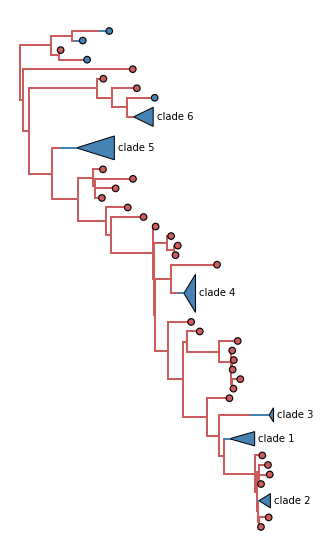

In [2]:
fig = plt.figure(figsize=(5, 10),facecolor='w') ## create figure
gs = gridspec.GridSpec(1,1,wspace=0.0) ## using gridspec by default
ax=plt.subplot(gs[0],facecolor='w') ## create axes

colour=lambda k: 'indianred' if k.traits['type']=='HongKong' else 'steelblue' ## colour red if branch type is Hong Kong, blue otherwise

ll.uncollapseSubtree() ## in case you're rerunning this cell - uncollapse branches so the next bit has something to do

collapse_target=lambda k: k.is_node() and 'type' in k.parent.traits and k.traits['type']!=k.parent.traits['type'] ## we want to collapse nodes whose parents aren't root and whose type is not the same as their parent

for idx,k in enumerate(ll.getBranches(collapse_target)): ## iterate over branches that satisfy our function
    ll.collapseSubtree(k,'clade %d'%(idx+1),widthFunction=lambda k: len(k.leaves)/2) ## collapse clade, assign unique name, clade triangle width will be half the space it would usually occupy
        
ll.plotTree(ax,colour=colour,zorder=10) ## plot collapsed tree
ll.plotPoints(ax,target=lambda k: k.is_leaf(),size=30,colour=colour,zorder=14) ## plot points on tips

clade_objects=lambda k: isinstance(k,bt.clade) ## identify clade objects

for k in ll.getExternal(clade_objects): ## iterate over tip-like objects that are clades
    start_x=k.x ## get beginning of triangle
    end_x=k.lastHeight ## get height of last child in clade
    y=k.y ## get y coordinate
    c=colour(k) ## get colour
    
    lower_left=[start_x,y-0.0005*len(ll.Objects)]
    upper_left=[start_x,y+0.0005*len(ll.Objects)]
    upper_right=[end_x,y+k.width/2.0]
    lower_right=[end_x,y-k.width/2.0]
    
    clade=plt.Polygon((lower_left,upper_left,upper_right,lower_right),facecolor=c,edgecolor='k',zorder=12) ## define a triangle polygon
    ax.add_patch(clade) ## add polygon
    ax.text(end_x+0.1,y,k.name,ha='left',va='center') ## add text label to clade
    
ax.set_ylim(-2,ll.ySpan+2)

[ax.spines[loc].set_visible(False) for loc in ax.spines] ## remove spines
ax.set_xticks([]) ## remove ticks and tick labels
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()